In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
pip install aif360

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
pip install git+https://github.com/hyperopt/hyperopt-sklearn

  Cloning https://github.com/hyperopt/hyperopt-sklearn to /tmp/pip-req-build-1zrrcu1d
  Running command git clone --filter=blob:none --quiet https://github.com/hyperopt/hyperopt-sklearn /tmp/pip-req-build-1zrrcu1d
  Resolved https://github.com/hyperopt/hyperopt-sklearn to commit d05042005772249998d9240b1310442500f8ebd7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hpsklearn: filename=hpsklearn-1.0.3-py3-none-any.whl size=135349 sha256=e1a994a7d1cdbaf94940ec3b296c092b9dc44974c1ab7ecac66c9f6dc959423a
  Stored in directory: /tmp/pip-ephem-wheel-cache-pzr9bl_4/wheels/01/e8/01/ad06c89501e4845c988d4e846f45f3485d9b60be0b9ebea43b
Successfully built hpsklearn


In [ ]:
# Import libraries

import numpy as np
import pandas as pd

import missingno

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from skopt import BayesSearchCV
from skopt.space import Integer

from hyperopt import tpe
from hpsklearn import HyperoptEstimator, svc

from sklearn.metrics import make_scorer

from aif360.sklearn.metrics import equal_opportunity_difference, average_odds_difference

from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [ ]:
census_df = pd.read_excel('census_data.xlsx')
print(f'Shape = {census_df.shape} \n')
census_df.head(6)

Shape = (16281, 15) 



,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [ ]:
census_df.replace('?', np.NaN, inplace = True)
census_df.head(6)

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


<Axes: >

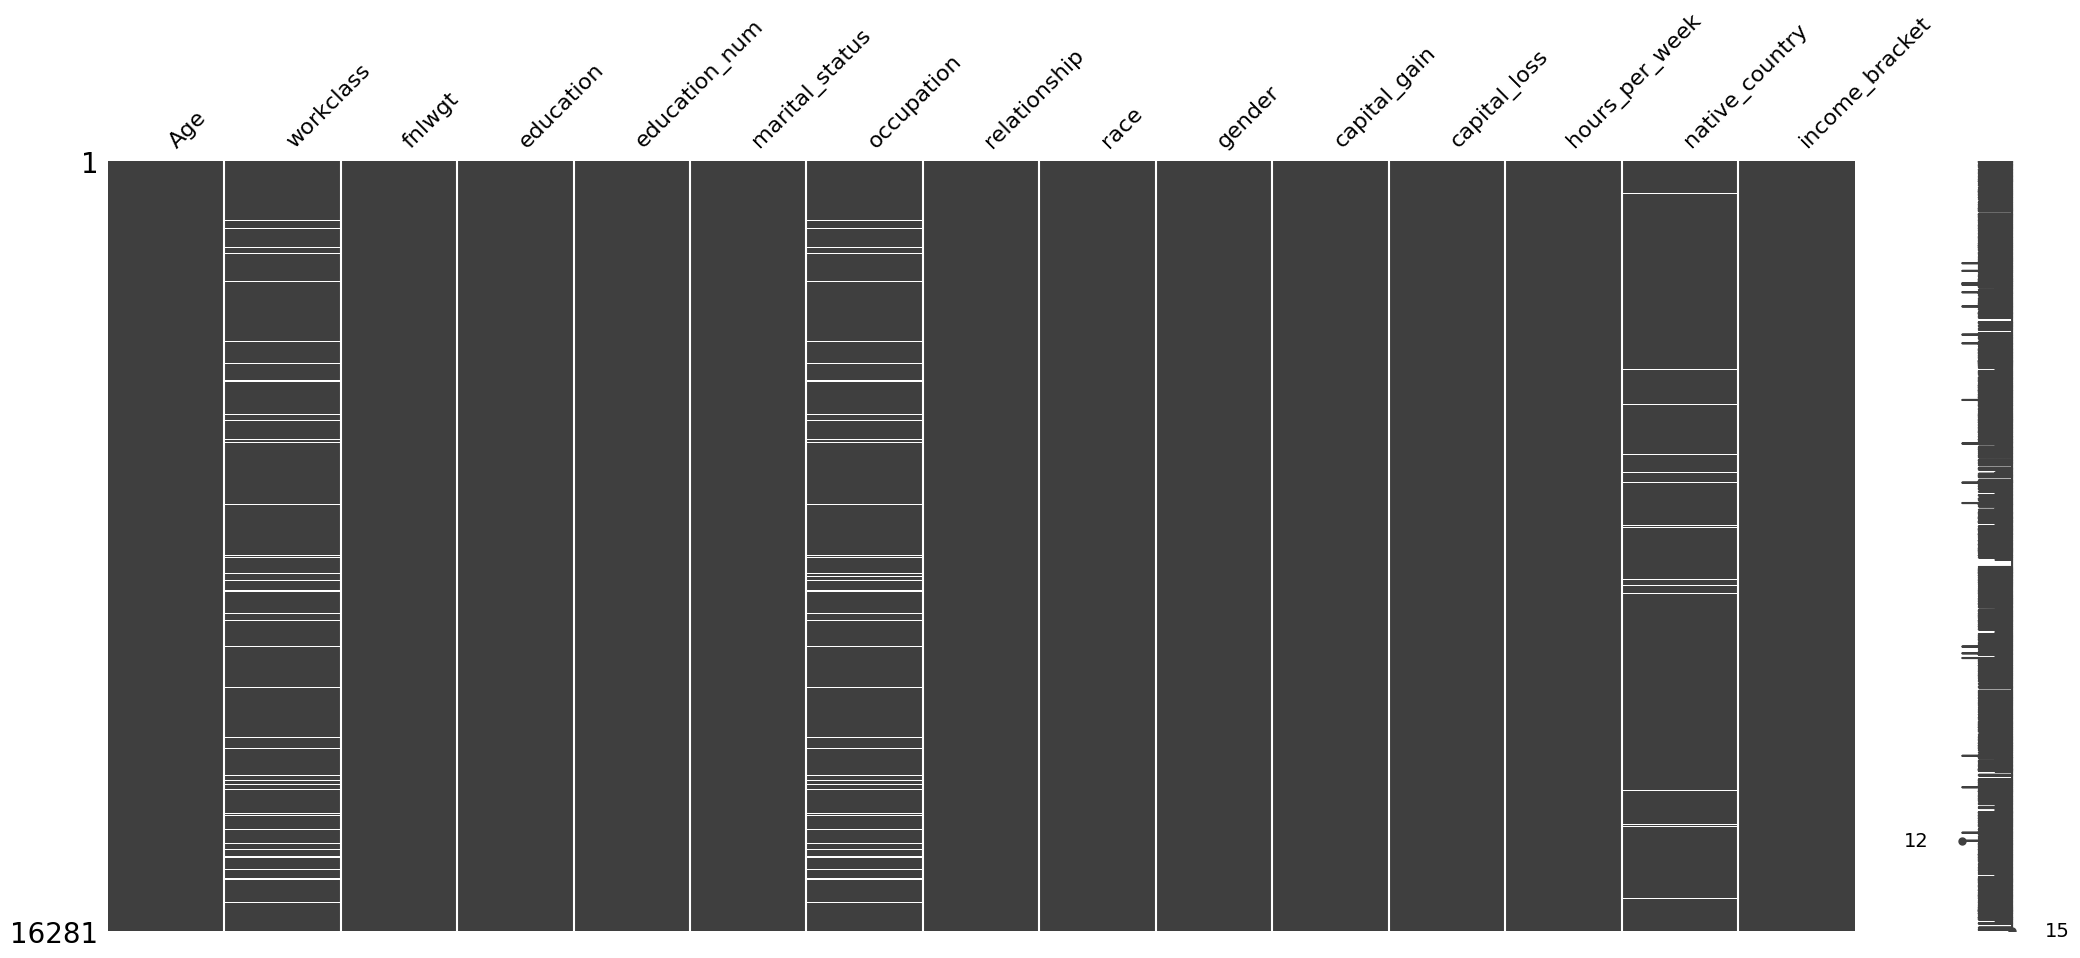

In [ ]:
# Visual representation of the missing data in the dataset

missingno.matrix(census_df)

In [ ]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   gender          16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16007 non-null  object
 14  income_bracket  16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [ ]:
census_df.dropna(inplace = True)
print(f'Shape = {census_df.shape} \n')

Shape = (15060, 15) 



# Partition train and test data

In [ ]:
census_feature_subset = census_df[['workclass', 'education_num', 'Age', 'relationship', 'native_country', 'occupation', 'gender', 'income_bracket']]
print(f'Shape = {census_feature_subset.shape} \n')
census_feature_subset.head()

Shape = (15060, 8) 



,workclass,education_num,Age,relationship,native_country,occupation,gender,income_bracket
0,Private,7,25,Own-child,United-States,Machine-op-inspct,Male,<=50K.
1,Private,9,38,Husband,United-States,Farming-fishing,Male,<=50K.
2,Local-gov,12,28,Husband,United-States,Protective-serv,Male,>50K.
3,Private,10,44,Husband,United-States,Machine-op-inspct,Male,>50K.
5,Private,6,34,Not-in-family,United-States,Other-service,Male,<=50K.


In [ ]:
census_feature_subset.dtypes

workclass         object
education_num      int64
Age                int64
relationship      object
native_country    object
occupation        object
gender            object
income_bracket    object
dtype: object

In [ ]:
census_feature_subset.describe()

,education_num,Age
count,15060.000000,15060.000000
mean,10.112749,38.768327
std,2.558727,13.380676
min,1.000000,17.000000
25%,9.000000,28.000000
50%,10.000000,37.000000
75%,13.000000,48.000000
max,16.000000,90.000000


In [ ]:
census_feature_subset.describe(include='object')

,workclass,relationship,native_country,occupation,gender,income_bracket
count,15060,15060,15060,15060,15060,15060
unique,7,6,40,14,2,2
top,Private,Husband,United-States,Exec-managerial,Male,<=50K.
freq,11021,6203,13788,1992,10147,11360


In [ ]:
census_feature_subset['native_country'].value_counts()

United-States                 13788
Mexico                          293
Philippines                      95
Puerto-Rico                      66
Germany                          65
Canada                           56
El-Salvador                      47
India                            47
China                            45
Cuba                             41
England                          33
Italy                            32
South                            30
Dominican-Republic               30
Japan                            30
Portugal                         28
Haiti                            27
Columbia                         26
Poland                           25
Guatemala                        23
Jamaica                          23
Greece                           20
Vietnam                          19
Ecuador                          16
Nicaragua                        15
Peru                             15
Iran                             14
Taiwan                      

In [ ]:
le = LabelEncoder()
census_feature_subset  = census_feature_subset.apply(le.fit_transform)
census_feature_subset.head()

,workclass,education_num,Age,relationship,native_country,occupation,gender,income_bracket
0,2,6,8,3,37,6,1,0
1,2,8,21,0,37,4,1,0
2,1,11,11,0,37,10,1,1
3,2,9,27,0,37,6,1,1
5,2,5,17,1,37,7,1,0


In [ ]:
census_feature_X = census_feature_subset.drop('income_bracket', axis = 1)
print(f'Shape = {census_feature_X.shape} \n')

Shape = (15060, 7) 



In [ ]:
census_feature_X.columns

Index(['workclass', 'education_num', 'Age', 'relationship', 'native_country',
       'occupation', 'gender'],
      dtype='object')

In [ ]:
'''le = LabelEncoder()
census_feature_X  = census_feature_X.apply(le.fit_transform)
census_feature_X.head()'''

'le = LabelEncoder()\ncensus_feature_X  = census_feature_X.apply(le.fit_transform)\ncensus_feature_X.head()'

In [ ]:
y = census_feature_subset['income_bracket']
print(f'Shape = {y.shape} \n')

Shape = (15060,) 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(census_feature_X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.drop('gender', axis = 1, inplace = True)
print(f'Shape = {X_train.shape} \n')
X_train.head()

Shape = (10090, 6) 



,workclass,education_num,Age,relationship,native_country,occupation
9600,4,12,12,0,37,3
1742,2,12,10,3,37,11
1017,2,10,16,0,37,12
5890,3,12,27,0,37,4
4345,2,8,34,1,37,0


In [ ]:
print(f'Shape = {y_train.shape} \n')
y_train.head()

Shape = (10090,) 



9600    1
1742    0
1017    0
5890    1
4345    0
Name: income_bracket, dtype: int64

In [ ]:
y_train.value_counts()

0    7637
1    2453
Name: income_bracket, dtype: int64

In [ ]:
print(f'Shape = {X_test.shape} \n')
X_test.columns

Shape = (4970, 7) 



Index(['workclass', 'education_num', 'Age', 'relationship', 'native_country',
       'occupation', 'gender'],
      dtype='object')

In [ ]:
X_test_sub = X_test.drop('gender', axis = 1)
print(f'Shape = {X_test_sub.shape} \n')
X_test_sub.head()

Shape = (4970, 6) 



,workclass,education_num,Age,relationship,native_country,occupation
12484,2,10,18,0,37,12
8668,3,13,26,0,22,3
8825,2,9,19,4,37,7
14947,2,7,36,0,37,7
9696,2,9,3,3,37,11


In [ ]:
print(f'Shape = {y_test.shape} \n')
y_test.head()

Shape = (4970,) 



12484    0
8668     1
8825     0
14947    0
9696     0
Name: income_bracket, dtype: int64

In [ ]:
y_test.value_counts()

0    3723
1    1247
Name: income_bracket, dtype: int64

## Fit the best KNN classifier for this data, by optimizing for “balanced accuracy”.

In [ ]:
rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 42)

In [ ]:
params = dict()
params['n_neighbors'] = Integer(2, 40)
params['weights'] = ['uniform', 'distance']
params['algorithm'] = ['ball_tree', 'kd_tree']
params['leaf_size'] = [25, 30, 35]
params['p'] = Integer(1, 3)

In [ ]:
knn_clf = KNeighborsClassifier()

In [ ]:
opt_knn = BayesSearchCV(estimator = knn_clf, search_spaces = params, cv = rskf, scoring = 'balanced_accuracy', n_iter = 100, n_jobs = 6, verbose = 2)

In [ ]:
opt_knn.fit(X_train, y_train)

Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for eac

BayesSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
              estimator=KNeighborsClassifier(), n_iter=100, n_jobs=6,
              scoring='balanced_accuracy',
              search_spaces={'algorithm': ['ball_tree', 'kd_tree'],
                             'leaf_size': [25, 30, 35],
                             'n_neighbors': Integer(low=2, high=40, prior='uniform', transform='normalize'),
                             'p': Integer(low=1, high=3, prior='uniform', transform='normalize'),
                             'weights': ['uniform', 'distance']},
              verbose=2)

In [ ]:
opt_knn.best_score_

0.6973795876474846

In [ ]:
opt_knn.best_params_

OrderedDict([('algorithm', 'ball_tree'),
             ('leaf_size', 35),
             ('n_neighbors', 5),
             ('p', 1),
             ('weights', 'uniform')])

In [ ]:
y_pred_knn =  opt_knn.predict(X_test_sub)
y_pred_knn

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
y_pred_knn.shape

(4970,)

In [ ]:
pd.Series(y_pred_knn).value_counts()

0    3906
1    1064
dtype: int64

## Fit the best SVM classifier for this data, by optimizing for “balanced accuracy”.

In [ ]:
def complement_balanced_accuracy(y_true, y_pred):
    return -balanced_accuracy_score(y_true, y_pred)

In [ ]:
complement_bal_accuracy_scorer = make_scorer(complement_balanced_accuracy)

In [ ]:
opt_svm_model = HyperoptEstimator(classifier = svc('mySVC'),
                                  preprocessing = [] ,
                                  algo = tpe.suggest,
                                  max_evals = 60,
                                  trial_timeout = 60,
                                  loss_fn = complement_balanced_accuracy)

In [ ]:
opt_svm_model.fit(X_train, y_train)

100%|██████████| 60/60 [00:03<00:00,  3.42s/trial, best loss: -0.6914156626506024]


In [ ]:
opt_svm_model.best_model()

{'learner': SVC(C=1.8544855433973249, coef0=0.2331053278222838,
     decision_function_shape='ovo', gamma='auto', random_state=1,
     tol=0.007656442074964058),
 'preprocs': (),
 'ex_preprocs': ()}

In [ ]:
best_svm_model = opt_svm_model.best_model()
best_svm_model

{'learner': SVC(C=1.8544855433973249, coef0=0.2331053278222838,
     decision_function_shape='ovo', gamma='auto', random_state=1,
     tol=0.007656442074964058),
 'preprocs': (),
 'ex_preprocs': ()}

In [ ]:
svm_clf = best_svm_model['learner']

In [ ]:
svm_clf.fit(X_train, y_train)

SVC(C=1.8544855433973249, coef0=0.2331053278222838,
    decision_function_shape='ovo', gamma='auto', random_state=1,
    tol=0.007656442074964058)

In [ ]:
y_pred_svm = svm_clf.predict(X_test_sub)
y_pred_svm

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_pred_svm.shape

(4970,)

In [ ]:
pd.Series(y_pred_svm).value_counts()

0    4113
1     857
dtype: int64

## Compute fairness metrics EOD and AAOD on the test data, for both learnt models

In [ ]:
def get_eod(df, y_true, clf, sensitive_attr = None, priv_group = 0):

  if sensitive_attr == None:

    y_pred = clf.predict(df)

    # Compute TPR
    recall_val_priv = recall_score(y_true, y_pred, pos_label = 0)
    recall_val_under_priv = recall_score(y_true, y_pred, pos_label = 1)

  else:
    test_data_priv = df[df[sensitive_attr] == priv_group]
    indices = test_data_priv.index
    test_data_under_priv = df[~df.index.isin(indices)]

    if sensitive_attr == 'gender':
      test_data_priv.drop('gender', axis = 1, inplace = True)
      test_data_under_priv.drop('gender', axis = 1, inplace = True)


    y_labels_priv = y_true[indices]
    y_labels_under_priv = y_true[~y_true.index.isin(indices)]

    y_pred_priv = clf.predict(test_data_priv)

    y_pred_under_priv = clf.predict(test_data_under_priv)

    # Compute TPR
    recall_val_priv = recall_score(y_labels_priv, y_pred_priv, pos_label = 0)
    recall_val_under_priv = recall_score(y_labels_under_priv, y_pred_under_priv, pos_label = 0)

  eod_val = recall_val_under_priv - recall_val_priv

  return eod_val

In [ ]:
def get_aaod(df, y_true, clf, sensitive_attr = None, priv_group = 0):

  if sensitive_attr == None:

    y_pred = clf.predict(df)

    # Compute TPR
    tpr_val_priv = recall_score(y_true, y_pred, pos_label = 0)
    tpr_val_under_priv = recall_score(y_true, y_pred, pos_label = 1)

    # Compute FPR
    fpr_val_priv = 1 - recall_score(y_true, y_pred, pos_label = 1)
    fpr_val_under_priv = 1 - recall_score(y_true, y_pred, pos_label = 0)

  else:
    test_data_priv = df[df[sensitive_attr] == priv_group]
    indices = test_data_priv.index
    test_data_under_priv = df[~df.index.isin(indices)]

    if sensitive_attr == 'gender':
      test_data_priv.drop('gender', axis = 1, inplace = True)
      test_data_under_priv.drop('gender', axis = 1, inplace = True)


    y_labels_priv = y_true[indices]
    y_labels_under_priv = y_true[~y_true.index.isin(indices)]

    y_pred_priv = clf.predict(test_data_priv)
    y_pred_under_priv = clf.predict(test_data_under_priv)

    # Compute TPR
    tpr_val_priv = recall_score(y_labels_priv, y_pred_priv, pos_label = 0)
    tpr_val_under_priv = recall_score(y_labels_under_priv, y_pred_under_priv, pos_label = 0)

    # Compute FPR
    fpr_val_priv = 1 - recall_score(y_labels_priv, y_pred_priv, pos_label = 1)
    fpr_val_under_priv = 1 - recall_score(y_labels_under_priv, y_pred_under_priv, pos_label = 1)

  aod_val = (abs(fpr_val_under_priv - fpr_val_priv) + abs(tpr_val_under_priv - tpr_val_priv)) / 2

  return aod_val

**Compute EOD on test data**

In [ ]:
# Compute EOD on test data for KNN

eod_knn = get_eod(X_test_sub, y_test, opt_knn)
eod_knn

-0.3723482692062885

In [ ]:
# Compute EOD on test data for SVM

eod_svm = get_eod(X_test_sub, y_test, opt_svm_model)
eod_svm

-0.4658145975266775

**Compute AAOD on test data**

In [ ]:
# Compute AAOD on test data for KNN

aod_knn = get_aaod(X_test_sub, y_test, opt_knn)
aod_knn

0.3723482692062885

In [ ]:
# Compute AAOD on test data for SVM

aod_svm = get_aaod(X_test_sub, y_test, opt_svm_model)
aod_svm

0.4658145975266774

## Plot bar charts comparing the fairness metrics between the 2 classifiers for “gender”, “native_country”, “occupation”

In [ ]:
def get_eod_non_binary_cat(category_name, categories, clf):
  eod_vals = {}

  for category in categories:
    eod_category = get_eod(X_test_sub , y_test, clf, sensitive_attr = category_name, priv_group = category)
    eod_vals[category] = eod_category

  return eod_vals

In [ ]:
def get_aaod_non_binary_cat(category_name, categories, clf):
  aaod_vals = {}

  for category in categories:
    aaod_category = get_aaod(X_test_sub , y_test, clf, sensitive_attr = category_name, priv_group = category)
    aaod_vals[category] = aaod_category

  return aaod_vals

### For **'gender'**

**For K-NN**

In [ ]:
eod_knn_gender = get_eod(X_test , y_test, opt_knn, sensitive_attr = 'gender')
eod_knn_gender

-0.10395681283551483

In [ ]:
aaod_knn_gender = get_aaod(X_test , y_test, opt_knn, sensitive_attr = 'gender')
aaod_knn_gender

0.15224671678759066

**For SVM**

In [ ]:
eod_svm_gender = get_eod(X_test , y_test, svm_clf, sensitive_attr = 'gender')
eod_svm_gender

-0.0782655769346764

In [ ]:
aaod_svm_gender = get_aaod(X_test , y_test, opt_knn, sensitive_attr = 'gender')
aaod_svm_gender

0.15224671678759066

**EOD Plot for 'gender'**

In [ ]:
fig = px.bar(x = ['KNN', 'SVC'], y = [eod_knn_gender, eod_svm_gender],
             width = 700,
             height = 500,
             title = 'Equal Oppurtunity Difference',
             labels = {'x' : 'Classifier', 'y' : 'Fairness metric value'})

fig.show()

**AOD Plot for 'gender'**

In [ ]:
fig = px.bar(x = ['KNN', 'SVC'], y = [aaod_knn_gender, aaod_svm_gender],
             width = 700,
             height = 500,
             title = 'Average Absolute Odds Difference',
             labels = {'x' : 'Classifier', 'y' : 'Fairness metric value'})

fig.show()

### For **'native_country'**

In [ ]:
uniq_countries = census_feature_X['native_country'].unique()
uniq_countries

array([37, 27, 12, 24,  5, 19, 10, 28, 35, 13,  7, 31, 38, 33,  3, 22, 17,
        0, 29, 23,  8,  4, 34, 20,  1, 30,  2, 25, 14, 18, 32, 21,  6, 39,
       16, 15, 11, 36, 26,  9])

In [ ]:
uniq_country_categories = census_df['native_country'].unique()
uniq_country_categories

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France'],
      dtype=object)

In [ ]:
len(X_test['native_country'].unique())

39

In [ ]:
missing_country_label = set(uniq_countries) - set(X_test['native_country'].unique())
missing_country_label

{23}

In [ ]:
missing_country_label_val = list(missing_country_label)[0]
missing_country_label_val

23

In [ ]:
missing_country_idx = np.where(uniq_countries == missing_country_label_val)[0][0]
missing_country_idx

19

In [ ]:
missing_country = uniq_country_categories[missing_country_idx]
missing_country

'Laos'

In [ ]:
uniq_countries = np.delete(uniq_countries, missing_country_idx)
uniq_countries

array([37, 27, 12, 24,  5, 19, 10, 28, 35, 13,  7, 31, 38, 33,  3, 22, 17,
        0, 29,  8,  4, 34, 20,  1, 30,  2, 25, 14, 18, 32, 21,  6, 39, 16,
       15, 11, 36, 26,  9])

**For K-NN**

In [ ]:
eod_knn_country = get_eod_non_binary_cat('native_country', uniq_countries, opt_knn)
eod_knn_country

{37: 0.03683343143025308,
 27: -0.1138014527845036,
 12: -0.11395474137931039,
 24: -0.11627267729521717,
 5: -0.1138014527845036,
 19: 0.8866200967221923,
 10: 0.316142202364904,
 28: 0.06314085267134384,
 35: -0.11364857603439016,
 13: -0.11383207750269109,
 7: -0.11404691291453217,
 31: -0.06637338890175193,
 38: -0.11383207750269109,
 33: 0.06840223354231967,
 3: -0.11383207750269109,
 22: -0.11383207750269109,
 17: -0.1138014527845036,
 0: 0.3865896264445041,
 29: -0.11383207750269109,
 8: 0.1365286367303038,
 4: -0.11404691291453217,
 34: -0.11364857603439016,
 20: 0.10886734877041826,
 1: -0.11395474137931039,
 30: -0.11364857603439016,
 2: 0.08661459736062482,
 25: 0.02929417192065209,
 14: 0.8866200967221923,
 18: 0.1365286367303038,
 32: -0.11374025275611721,
 21: -0.11386271870794074,
 6: -0.11374025275611721,
 39: -0.11364857603439016,
 16: 0.3865896264445041,
 15: -0.1137096774193549,
 11: -0.11374025275611721,
 36: 0.8866200967221923,
 26: -0.1137096774193549,
 9: 0.55349

In [ ]:
aaod_knn_country = get_aaod_non_binary_cat('native_country', uniq_countries, opt_knn)
aaod_knn_country

{37: 0.07847418697949432,
 27: 0.31433044526775383,
 12: 0.313994211106656,
 24: 0.1905780120184855,
 5: 0.3141238403569388,
 19: 0.45033816081089534,
 10: 0.23457163708813256,
 28: 0.18921937963679913,
 35: 0.3000024581616574,
 13: 0.1474840987727818,
 7: 0.3140402968742669,
 31: 0.290823350399429,
 38: 0.31413915271603254,
 33: 0.1107016526768404,
 3: 0.31393287916834633,
 22: 0.1474840987727818,
 17: 0.21732242931999823,
 0: 0.45031165363925285,
 29: 0.3143457576268476,
 8: 0.0891761833804095,
 4: 0.1478104561886655,
 34: 0.3001977819930987,
 20: 0.1309342102908897,
 1: 0.10613391589883192,
 30: 0.31446094396574814,
 2: 0.15811144614575023,
 25: 0.27166392637732684,
 14: 0.7003268887780969,
 18: 0.3254874323298389,
 32: 0.3138869667950594,
 21: 0.31394819977097116,
 6: 0.3138869667950594,
 39: 0.31384112843419587,
 16: 0.43647298336671436,
 15: 0.30003300885413975,
 11: 0.3140932403427456,
 36: 0.7003268887780969,
 26: 0.31407795267436445,
 9: 0.533970425792644}

**For SVM**

In [ ]:
eod_svm_country = get_eod_non_binary_cat('native_country', uniq_countries, svm_clf)
eod_svm_country

{37: 0.06086295105718298,
 27: -0.07721280602636538,
 12: -0.07731681034482762,
 24: -0.06684991753710834,
 5: -0.07721280602636538,
 19: -0.07710908113917248,
 10: -0.0056811616531218245,
 28: -0.07744198596869944,
 35: -0.07710908113917248,
 13: -0.07723358449946183,
 7: -0.0056811616531218245,
 31: -0.07752566180442999,
 38: 0.06589266492388135,
 33: -0.07731681034482762,
 3: -0.07723358449946183,
 22: -0.07723358449946183,
 17: 0.08972289480764051,
 0: 0.4231389411448535,
 29: -0.07723358449946183,
 8: -0.07717128260285022,
 4: -0.07737934753302778,
 34: -0.07710908113917248,
 20: -0.0772751750134626,
 1: -0.07731681034482762,
 30: -0.07710908113917248,
 2: -0.07729598707244811,
 25: -0.07723358449946183,
 14: -0.07710908113917248,
 18: -0.07717128260285022,
 32: -0.07717128260285022,
 21: -0.07725437415881564,
 6: -0.07717128260285022,
 39: -0.07710908113917248,
 16: -0.0771298038161784,
 15: -0.0771505376344086,
 11: -0.07717128260285022,
 36: 0.92315959161741,
 26: -0.0771505376

In [ ]:
aaod_svm_country = get_aaod_non_binary_cat('native_country', uniq_countries, svm_clf)
aaod_svm_country

{37: 0.1772705559883616,
 27: 0.26752206566378506,
 12: 0.26720692161186854,
 24: 0.26270894911449144,
 5: 0.267338345228271,
 19: 0.2674702032201886,
 10: 0.23194025928315254,
 28: 0.26818959201816617,
 35: 0.31022388246364724,
 13: 0.26771647070632254,
 7: 0.23138909726601564,
 31: 0.2678625093588066,
 38: 0.261678274677029,
 33: 0.10068948770188868,
 3: 0.26716530868918564,
 22: 0.10064787477920578,
 17: 0.10704248420210127,
 0: 0.4401179870118815,
 29: 0.2675324549003333,
 8: 0.1568767919027534,
 4: 0.18460694478451017,
 34: 0.2674702032201886,
 20: 0.2677372659633229,
 1: 0.10114153607659737,
 30: 0.26765421902617786,
 2: 0.1966549059786204,
 25: 0.26716530868918564,
 14: 0.26710305700904097,
 18: 0.3102549831954861,
 32: 0.26713415774087984,
 21: 0.26717570351886255,
 6: 0.26713415774087984,
 39: 0.26710305700904097,
 16: 0.3102342438021502,
 15: 0.2673072110322926,
 11: 0.3102549831954861,
 36: 0.6901283122481597,
 26: 0.2673072110322926,
 9: 0.2673072110322926}

### For **'occupation'**

In [ ]:
uniq_occupations = census_feature_X['occupation'].unique()
uniq_occupations

array([ 6,  4, 10,  7,  9,  2,  0,  3, 12, 11,  8, 13,  5,  1])

In [ ]:
uniq_occup_categories = census_df['occupation'].unique()
uniq_occup_categories

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

**For K-NN**

In [ ]:
eod_knn_occup = get_eod_non_binary_cat('occupation', uniq_occupations, opt_knn)
eod_knn_occup

{6: -0.10432738961669086,
 4: -0.017757946068888475,
 10: 0.10560373361578179,
 7: -0.10067798200226596,
 9: 0.1563511253958827,
 2: -0.004246977013194875,
 0: -0.09965711906540464,
 3: 0.1754649128490896,
 12: 0.023159533073929928,
 11: 0.0521561328876734,
 8: -0.11457204767063922,
 13: -0.003258003485929639,
 5: -0.09838968192890996,
 1: -0.11364857603439016}

In [ ]:
aaod_knn_occup = get_aaod_non_binary_cat('occupation', uniq_occupations, opt_knn)
aaod_knn_occup

{6: 0.28223013999106966,
 4: 0.2414754832957226,
 10: 0.06070643011713878,
 7: 0.2391061781369988,
 9: 0.20279801332328046,
 2: 0.0790343869305618,
 0: 0.18140469816769872,
 3: 0.18794120020913996,
 12: 0.059204096357634184,
 11: 0.03763394990699859,
 8: 0.3004641939797819,
 13: 0.14460629358484872,
 5: 0.3097639466555119,
 1: 0.3140474019818821}

**For SVM**

In [ ]:
eod_svm_occup = get_eod_non_binary_cat('occupation', uniq_occupations, svm_clf)
eod_svm_occup

{6: -0.0835516739446871,
 4: -0.0012759969931188664,
 10: 0.1059976168409904,
 7: -0.08061996204166766,
 9: 0.13288102286207693,
 2: -0.00018830618585830017,
 0: -0.052796316479102545,
 3: 0.12553780859197816,
 12: 0.003012784880489172,
 11: 0.02015809109017863,
 8: -0.07773564463705307,
 13: -0.036864450966079154,
 5: -0.07060113526556067,
 1: -0.07710908113917248}

In [ ]:
aaod_svm_occup = get_aaod_non_binary_cat('occupation', uniq_occupations, svm_clf)
aaod_svm_occup

{6: 0.25440042168995153,
 4: 0.14798001097282742,
 10: 0.07505157016822811,
 7: 0.22433856798579926,
 9: 0.19132138177398522,
 2: 0.09298048495657041,
 0: 0.15756677518857226,
 3: 0.16379352467045466,
 12: 0.08875911937683179,
 11: 0.050757699903782094,
 8: 0.31053716421258754,
 13: 0.23100581673619347,
 5: 0.26700788470595105,
 1: 0.26728648278467454}

**For K-NN**

In [ ]:
eod_knn = equal_opportunity_difference(y_test, y_pred = y_pred_knn)
eod_knn

In [ ]:
equal_opportunity_difference(y_test, y_pred = y_pred_knn, pos_label = 0)

In [ ]:
pd.Series(y_pred_knn).value_counts()

In [ ]:
confusion_matrix(y_test, y_pred_knn)

array([[3411,  312],
       [ 661,  586]])

In [ ]:
# To verify the confusion matrix and labels

pd.crosstab(y_test, y_pred_knn, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,3411,312,3723
1,661,586,1247
All,4072,898,4970


In [ ]:
3411/(3411+312)

0.9161966156325544

In [ ]:
recall_score(y_test, y_pred_knn, pos_label = 0)

0.9161966156325544

In [ ]:


recall_score(y_test, y_pred_knn, average=None)

array([0.91619662, 0.46992783])

In [ ]:
0.88638195 - 0.51403368

In [ ]:
aod_knn = average_odds_difference(y_test, y_pred_knn)
aod_knn

**For SVM**

In [ ]:
eod_knn = equal_opportunity_difference(y_test, y_pred_knn)
eod_knn

In [ ]:
aod_svm = average_odds_difference(y_test, y_pred_svm)
aod_svm

## Plot bar charts comparing the fairness metrics between the 2 classifiers for “gender”, “native_country”, “occupation”

**For 'gender'**

In [ ]:
eod_knn_gender = equal_opportunity_difference(y_test, y_pred_knn, prot_attr=X_test['gender'])
eod_knn_gender

In [ ]:
equal_opportunity_difference(y_test, y_pred_knn, prot_attr=X_test['gender'], priv_group = 0)

In [ ]:
equal_opportunity_difference(y_test, y_pred_knn, prot_attr=X_test['gender'], priv_group = 1)

In [ ]:
equal_opportunity_difference(y_test, y_pred = y_pred_knn, prot_attr=X_test['gender'], pos_label = 0)

In [ ]:
# To verify

y_pred_knn_gender =  opt_knn.predict(X_test_sub)
y_pred_knn_gender

In [ ]:
aod_knn_gender = average_odds_difference(y_test, y_pred_knn, prot_attr=X_test['gender'])
aod_knn_gender

**For 'native_country'**

**For 'occupation'**

In [ ]:
average_odds_difference(y_test, y_pred_knn, prot_attr=X_test['occupation'], pos_label = '>50K.')

In [ ]:
here

## Fit the best SVM classifier for this data, by optimizing for “balanced accuracy”.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio

# Sample data
data = {
    'workclass': ['Private', 'Self-emp-not-inc', 'Private', 'Private', 'Self-emp-not-inc'],
    'education_num': [13, 9, 7, 11, 13],
    'Age': [35, 50, 28, 42, 34],
    'relationship': ['Husband', 'Wife', 'Not-in-family', 'Husband', 'Not-in-family'],
    'native_country': ['United-States', 'United-States', 'Mexico', 'United-States', 'United-States'],
    'occupation': ['Exec-managerial', 'Sales', 'Craft-repair', 'Exec-managerial', 'Craft-repair'],
    'gender': ['Male', 'Female', 'Male', 'Male', 'Female'],
    'income_bracket': ['>50K', '<=50K', '<=50K', '>50K', '<=50K']
}

df = pd.DataFrame(data)

# Label encoding for categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['native_country'] = label_encoder.fit_transform(df['native_country'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])

df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])

# Feature columns
X = df[['workclass', 'education_num', 'Age', 'relationship', 'native_country', 'occupation', 'gender']]
# Target column
y = df['income_bracket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train a model (Random Forest for example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Fairness metrics
gender_dpr = demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test['gender'])
native_country_dpr = demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test['native_country'])
occupation_dpr = demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test['occupation'])

gender_eor = equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test['gender'])
native_country_eor = equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test['native_country'])
occupation_eor = equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test['occupation'])

# Display fairness metrics
print(f'Gender DPR: {gender_dpr:.4f}, EOR: {gender_eor:.4f}')
print(f'Native Country DPR: {native_country_dpr:.4f}, EOR: {native_country_eor:.4f}')
print(f'Occupation DPR: {occupation_dpr:.4f}, EOR: {occupation_eor:.4f}')


In [ ]:
from fairlearn.metrics import equalized_odds_difference

In [ ]:
equalized_odds_difference(y_test, y_pred_knn, sensitive_features = X_test['gender'], method='between_groups')

In [ ]:
y_test

In [ ]:
X_test['gender'].unique()

In [ ]:
equal_opportunity_difference(y_test, y_pred, prot_attr=X_test['gender'], pos_label = '>50K')

In [ ]:
average_odds_difference(y_test, y_pred, prot_attr=X_test['gender'], pos_label = '>50K')

In [ ]:
opt_svm_model_200 = HyperoptEstimator(classifier = svc('mySVC'),
                                  preprocessing = [] ,
                                  algo = tpe.suggest,
                                  max_evals=200,
                                  trial_timeout = 120,
                                  loss_fn = complement_balanced_accuracy)

In [ ]:
opt_svm_model_200.fit(X_train, y_train)